# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import datetime as dt
import pytz

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv('example.env')

True

## Part 1 - Personal Finance Planner

In [3]:
## Part 1 - Instructions
#In this section of the challenge, you will create a personal finance planner application. To develop the personal finance planner prototype, you should take into account the following assumptions:

#* The average household income for each member of the credit union is $12,000.

#* Every union member has a savings portfolio composed of cryptocurrencies, stocks and bonds:

#    * Assume the following amount of crypto assets: `1.2` BTC and `5.3` ETH.

#    * Assume the following amount of shares in stocks and bonds: `50` SPY (stocks) and `200` AGG (bonds).

#Use the starter Jupyter notebook to complete the following steps.

#### Collect Crypto Prices Using the `requests` Library

#1. Create two variables called `my_btc` and `my_eth`. Set them equal to `1.2` and `5.3`, respectively.

#2. Use the `requests` library to fetch the current price in US dollars of bitcoin (`BTC`) and ethereum (`ETH`) using the **Alternative Free Crypto API** endpoints provided in the starter notebook.

#3. Parse the API JSON response to select only the crypto prices and store each price in a variable.

#    **Hint:** Be aware of the particular identifier for each cryptocurrency in the API JSON response - the bitcoin identifier is `1` whereas ethereum is `1027`.

#4. Compute the portfolio value of cryptocurrencies and print the results.

### Collect Crypto Prices Using the `requests` Library

In [4]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [5]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [6]:
# Fetch current BTC price
btc_response=requests.get(btc_url)
eth_response=requests.get(eth_url)

# Fetch current ETH price
current_btc_price = float(btc_response.json()["data"]["1"]["quotes"]["USD"]["price"])
current_eth_price = float(eth_response.json()["data"]["1027"]["quotes"]["USD"]["price"])

# Compute current value of my crpto
my_btc_value = current_btc_price * my_btc
my_eth_value = current_eth_price * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $38336.40
The current value of your 5.3 ETH is $6413.16


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
#### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

#**Important:** Remember to create a `.env` file in your working directory to store the values of your Alpaca API key and Alpaca secret key.

#1. Create two variables named `my_agg` and `my_spy` and set them equal to `200` and `50`, respectively.

#2. Set the Alpaca API key and secret key variables, then create the Alpaca API object using the `tradeapi.REST` function from the Alpaca SDK.

#3. Format the current date as ISO format. You may change the date set in the starter code to the current date.

#4. Get the current closing prices for `SPY` and `AGG` using Alpaca's `get_barset()` function. Transform the function's response to a Pandas DataFrame and preview the data.

#5. Pick the `SPY` and `AGG` close prices from the Alpaca's `get_barset()` DataFrame response and store them as Python variables. Print the closing values for validation.

#6. Compute the value in dollars of the current amount of shares and print the results.

In [8]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [9]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_api_key

'PK3SWEUL4DIYM0SG8DQ3'

In [10]:
# Set Alpaca API key and secret
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
alpaca_secret_key

'BQgCzY1szuHc9ctPaWKABsA42DkbeScO0JyQgpM8'

In [11]:
# Create the Alpaca API object
alpaca_api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    base_url = 'https://paper-api.alpaca.markets'
)

In [12]:
# Format current date as ISO format
today = pd.Timestamp.today(tz="America/New_York").isoformat()

In [13]:
# Set the tickers
tickers = ["AGG", "SPY"]
tickers

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

In [14]:
# Get current closing prices for SPY and AGG
df_portfolio = alpaca_api.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df


# Preview DataFrame
df_portfolio.head(1)

AGG                                        SPY  \
                             open      high     low   close   volume    open   
time                                                                           
2021-01-21 00:00:00-05:00  117.22  117.2985  117.14  117.26  5801029  384.49   

                                                            
                             high     low  close    volume  
time                                                        
2021-01-21 00:00:00-05:00  384.95  383.25  384.2  41800991

In [15]:
# Pick AGG and SPY close prices
df_closing_prices = pd.DataFrame()
agg_close_price = df_portfolio["AGG"]["close"].item()
spy_close_price = df_portfolio["SPY"]["close"].item()

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price:0.2f}")
print(f"Current SPY closing price: ${spy_close_price:0.2f}")

Current AGG closing price: $117.26
Current SPY closing price: $384.20


In [16]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_spy_value

19210.0

In [17]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_agg_value

23452.0

In [18]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19210.00
The current value of your 200 AGG shares is $23452.00


### Savings Health Analysis

In [19]:
#### Savings Health Analysis

#In this section, you will assess the financial health of the credit union's members.

#1. Create a variable called `monthly_income` and set its value to `12000`.

#2. To analyze savings health, create a DataFrame called `df_savings` with two rows. Store the total value in dollars of the crypto assets in the first row and the total value of the shares in the second row.

#    **Hint:** The `df_savings` DataFrame should have one column named `amount` and two rows where `crypto` and `shares` are the index values: 
    
#    ![df_savings](Images/df_savings.png)

#3. Use the `df_savings` DataFrame to plot a pie chart to visualize the composition of personal savings.

#4. Use `if` conditional statements to validate if the current savings are enough for an emergency fund. An ideal emergency fund should be equal to three times your monthly income.

#    * If total savings are greater than the emergency fund, display a message congratulating the person for having enough money in this fund.

#    * If total savings are equal to the emergency fund, display a message congratulating the person on reaching this financial goal.

#    * If total savings are less than the emergency fund, display a message showing how many dollars away the person is from reaching the goal.

In [20]:
# Set monthly household income and asset values
monthly_income = 12000
combined_crypto_assets = my_btc_value+my_eth_value
combined_share_value = my_spy_value+my_agg_value

In [21]:
# Create savings DataFrame
amount_column = {'amount': [combined_crypto_assets, combined_share_value]}
df_savings = pd.DataFrame(data=amount_column,index=['crypto','shares'])

# Display savings DataFrame
display(df_savings)

,amount
crypto,44749.559
shares,42662.000


<AxesSubplot:ylabel='amount'>

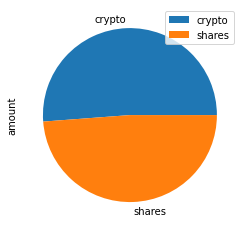

In [22]:
# Plot savings pie chart
df_savings.plot(kind='pie', y='amount')

In [23]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings.sum().item()

# Validate saving health
if total_savings > emergency_fund:
    print('Congratulations for having enough money in savings fund')
elif total_savings == emergency_fund:
    print('Congratulations on reaching emergency fund financial goal')
else:
    print(f'you still need {emergency_fund - total_savings } to reach your financial goal')

Congratulations for having enough money in savings fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [24]:
#### Monte Carlo Simulation

#1. Use the Alpaca API to fetch five years historical closing prices for a traditional `40/60` portfolio using the `SPY` and `AGG` tickers to represent the `60%` stocks (`SPY`) and `40%` bonds (`AGG`) composition of the portfolio. Make sure to convert the API output to a DataFrame and preview the output.

#2. Configure and execute a Monte Carlo Simulation of `500` runs and `30` years for the `40/60` portfolio.

#3. Plot the simulation results and the probability distribution/confidence intervals.

#    ![monte carlo](Images/monte-carlo.png)
        
#    ![histogram](Images/histogram.png)

In [25]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
end_date = dt.datetime.now()
end_date

datetime.datetime(2021, 1, 21, 16, 9, 46, 172774)

In [26]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = end_date - dt.timedelta(days=5*365)
start_date

datetime.datetime(2016, 1, 23, 16, 9, 46, 172774)

In [27]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca_api.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Display sample data
df_stock_data.head()

AGG                                       SPY  \
                             open    high     low   close    volume    open   
time                                                                          
2020-08-28 00:00:00-04:00  118.08  118.16  117.99  118.12  10432920  349.44   
2020-08-31 00:00:00-04:00  118.14  118.51  118.14  118.37  14652086  350.35   
2020-09-01 00:00:00-04:00  118.12  118.44  118.00  118.43  18834492  350.21   
2020-09-02 00:00:00-04:00  118.42  118.71  118.34  118.66   8565963  354.67   
2020-09-03 00:00:00-04:00  118.73  118.87  118.62  118.69  11833793  355.87   

                                                              
                             high     low   close     volume  
time                                                          
2020-08-28 00:00:00-04:00  350.72  348.15  350.54   84525436  
2020-08-31 00:00:00-04:00  351.30  349.09  349.34  103053041  
2020-09-01 00:00:00-04:00  352.69  349.24  352.56   92440865  
2020-09-02 00:00:00-04:00  358.75  353.43  357.68  125347727  
2020-09-03 00:00:00-04:00  356.38  342.59  345.41  254965602

In [28]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [29]:
# Printing the simulation input data
MC_30year.portfolio_data.head()

AGG                                    \
                             open    high     low   close    volume   
time                                                                  
2020-08-28 00:00:00-04:00  118.08  118.16  117.99  118.12  10432920   
2020-08-31 00:00:00-04:00  118.14  118.51  118.14  118.37  14652086   
2020-09-01 00:00:00-04:00  118.12  118.44  118.00  118.43  18834492   
2020-09-02 00:00:00-04:00  118.42  118.71  118.34  118.66   8565963   
2020-09-03 00:00:00-04:00  118.73  118.87  118.62  118.69  11833793   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2020-08-28 00:00:00-04:00          NaN  349.44  350.72  348.15  350.54   
2020-08-31 00:00:00-04:00     0.002116  350.35  351.30  349.09  349.34   
2020-09-01 00:00:00-04:00     0.000507  350.21  352.69  349.24  352.56   
2020-09-02 00:00:00-04:00     0.001942  354.67  358.75  353.43  357.68   
2020-09-03 00:00:00-04:00     0.000253  355.87  356.38  342.59  345.41   

                                                   
                              volume daily_return  
time                                               
2020-08-28 00:00:00-04:00   84525436          NaN  
2020-08-31 00:00:00-04:00  103053041    -0.003423  
2020-09-01 00:00:00-04:00   92440865     0.009217  
2020-09-02 00:00:00-04:00  125347727     0.014522  
2020-09-03 00:00:00-04:00  254965602    -0.034304

In [30]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003009,1.003227,1.013002,0.990709,0.992393,1.000092,0.997554,1.001995,0.998573,1.014702,...,1.012248,1.002707,1.006317,1.002487,1.002985,0.999275,0.993030,1.000167,1.001925,0.999070
2,1.006186,1.015801,1.010139,0.989895,0.993967,0.997616,1.000058,1.010251,1.007660,1.010512,...,1.017023,1.007407,0.997318,0.995052,0.993937,0.991361,0.985483,0.986113,1.004858,1.001176
3,0.999943,1.016277,0.999644,0.984808,0.986503,1.016440,1.002288,1.018336,1.008003,1.018223,...,1.011180,0.988952,0.996601,0.985790,0.989041,0.978098,0.987943,0.966723,1.016584,1.007129
4,1.000107,1.016739,1.004090,0.978468,0.986447,1.019794,1.016758,1.013449,1.009068,1.014112,...,1.013619,0.987817,0.984173,0.980606,0.985723,0.984447,1.001453,0.968759,1.013299,1.004237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,132.387048,56.785498,20.116117,44.861084,54.941481,79.783784,44.127229,34.672181,81.176502,91.690599,...,27.046145,120.652767,24.926227,128.537969,34.557978,56.207096,65.348207,29.367316,76.457539,41.093081
7557,133.377835,56.205780,20.147389,44.735916,55.034314,79.941883,44.393960,34.958522,80.620432,91.460416,...,27.130062,121.667823,24.933596,128.356446,34.559962,56.192297,65.382834,29.406304,76.432444,41.638603
7558,134.087253,55.896793,20.208072,45.109800,55.289532,79.826955,44.256726,35.050506,80.492310,92.021779,...,27.275109,120.682644,24.870706,129.389330,34.922806,55.890237,65.583603,29.678636,76.626014,41.522331
7559,135.049080,56.282135,20.123149,45.150106,55.390431,79.715809,43.758588,35.102347,80.921428,92.321536,...,26.956689,121.649976,24.742702,128.609159,35.335041,55.916956,65.098745,29.748609,76.705250,41.831523


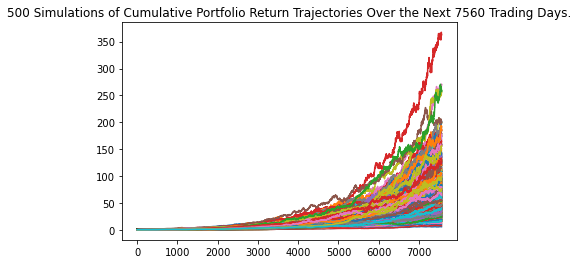

In [31]:
# Plot simulation outcomes
line_plot = MC_30year.plot_simulation()
line_plot.get_figure().savefig("MC_30year_sim_plot.png", bbox_inches="tight")

NameError: name 'dist_plot' is not defined

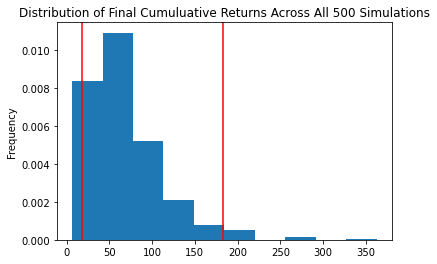

In [32]:
# Plot probability distribution and confidence intervals
probability_distribution = MC_30year.plot_distribution()
dist_plot.get_figure().savefig('MC_30year_dist_plot.png',bbox_inches='tight')

### Retirement Analysis

In [ ]:
#### Retirement Analysis

#1. Fetch the summary statistics from the Monte Carlo simulation results.

#1. Given an initial investment of `$20,000`, calculate the expected portfolio return in dollars at the `95%` lower and upper confidence intervals.

#2. Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_statistics = MC_30year.summarize_cumulative_return()

# Print summary statistics
print(summary_statistics)

### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(summary_statistics[8]*initial_investment,2)
ci_upper = round(summary_statistics[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
### Optional Challenge - Early Retirement

#The CTO of the Credit Union was really impressed with your work on this planner, but commented that `30` years seems like such a long time to wait to retire! The CTO starts wondering if the retirement plan could be adjusted to account for an earlier than normal retirement.

#Try adjusting the portfolio to either include more risk (a higher stock than bond ratio) or to have a larger initial investment and rerun the retirement analysis to see what it would take to retire in `5` or `10` years instead of `30`!


In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5year.calc_cumulative_return()

In [ ]:
# Plot simulation outcomes
line_plot = MC_5year.plot_simulation()
line_plot.get_figure().savefig("MC_5year_sim_plot.png", bbox_inches="tight")

In [ ]:
# Plot probability distribution and confidence intervals
dist_plot = MC_5year.plot_distribution()
dist_plot.get_figure().savefig('MC_5year_dist_plot.png',bbox_inches='tight')

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_statistics_5yr = MC_30year.summarize_cumulative_return()

# Print summary statistics
print(summary_statistics_5yr)

In [ ]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(summary_statistics_5yr[8]*initial_investment,2)
ci_upper_five = round(summary_statistics_5yr[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10year.calc_cumulative_return()

In [ ]:
# Plot simulation outcomes
line_plot = MC_10year.plot_simulation()
line_plot.get_figure().savefig("MC_10year_sim_plot.png", bbox_inches="tight")

In [ ]:
# Plot probability distribution and confidence intervals
dist_plot = MC_10year.plot_distribution()
dist_plot.get_figure().savefig('MC_10year_dist_plot.png',bbox_inches='tight')

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_statistics_10yr = MC_10year.summarize_cumulative_return()

# Print summary statistics
print(summary_statistics_105yr)

In [ ]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tb3[8]*initial_investment,2)
ci_upper_ten = round(tb3[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")